In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

In [3]:
first_data = pd.read_csv('diabetes_data_upload.csv')

In [4]:
first_data.rename(columns={'class': 'Diabetes Result'}, inplace=True)

In [5]:
mappings = {'Male': 0, 'Female': 1, 'Yes': 1, 
            'No': 0, 'Positive': 1, 
            'Negative': 0}
scored_data = first_data.replace(mappings)

In [6]:
scored_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
scored_data.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
Diabetes Result       int64
dtype: object

In [8]:
scored_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


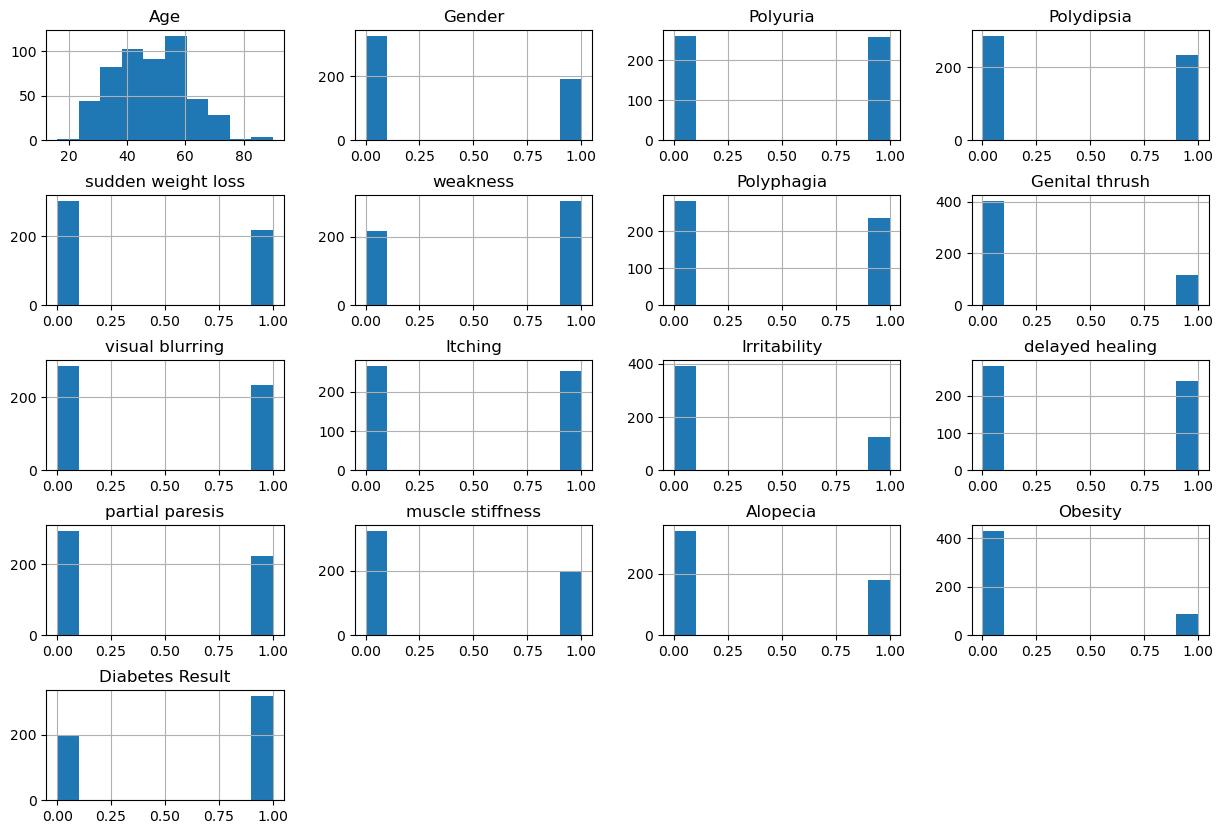

In [9]:
scored_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

#### 1. Evaluation of correlation to the dependent variable. 

From the data that was converted from the data wrangling of the diabetes data set, our goal is to determine which observed symptom or symptoms most accurately is associated with diabetes. Thus the "Diabetes Result" is our dependant variable to be implemented. The below steps show early analysis of correlation to the "Diabetes Result". 

In [10]:
scored_data.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
Age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
Polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

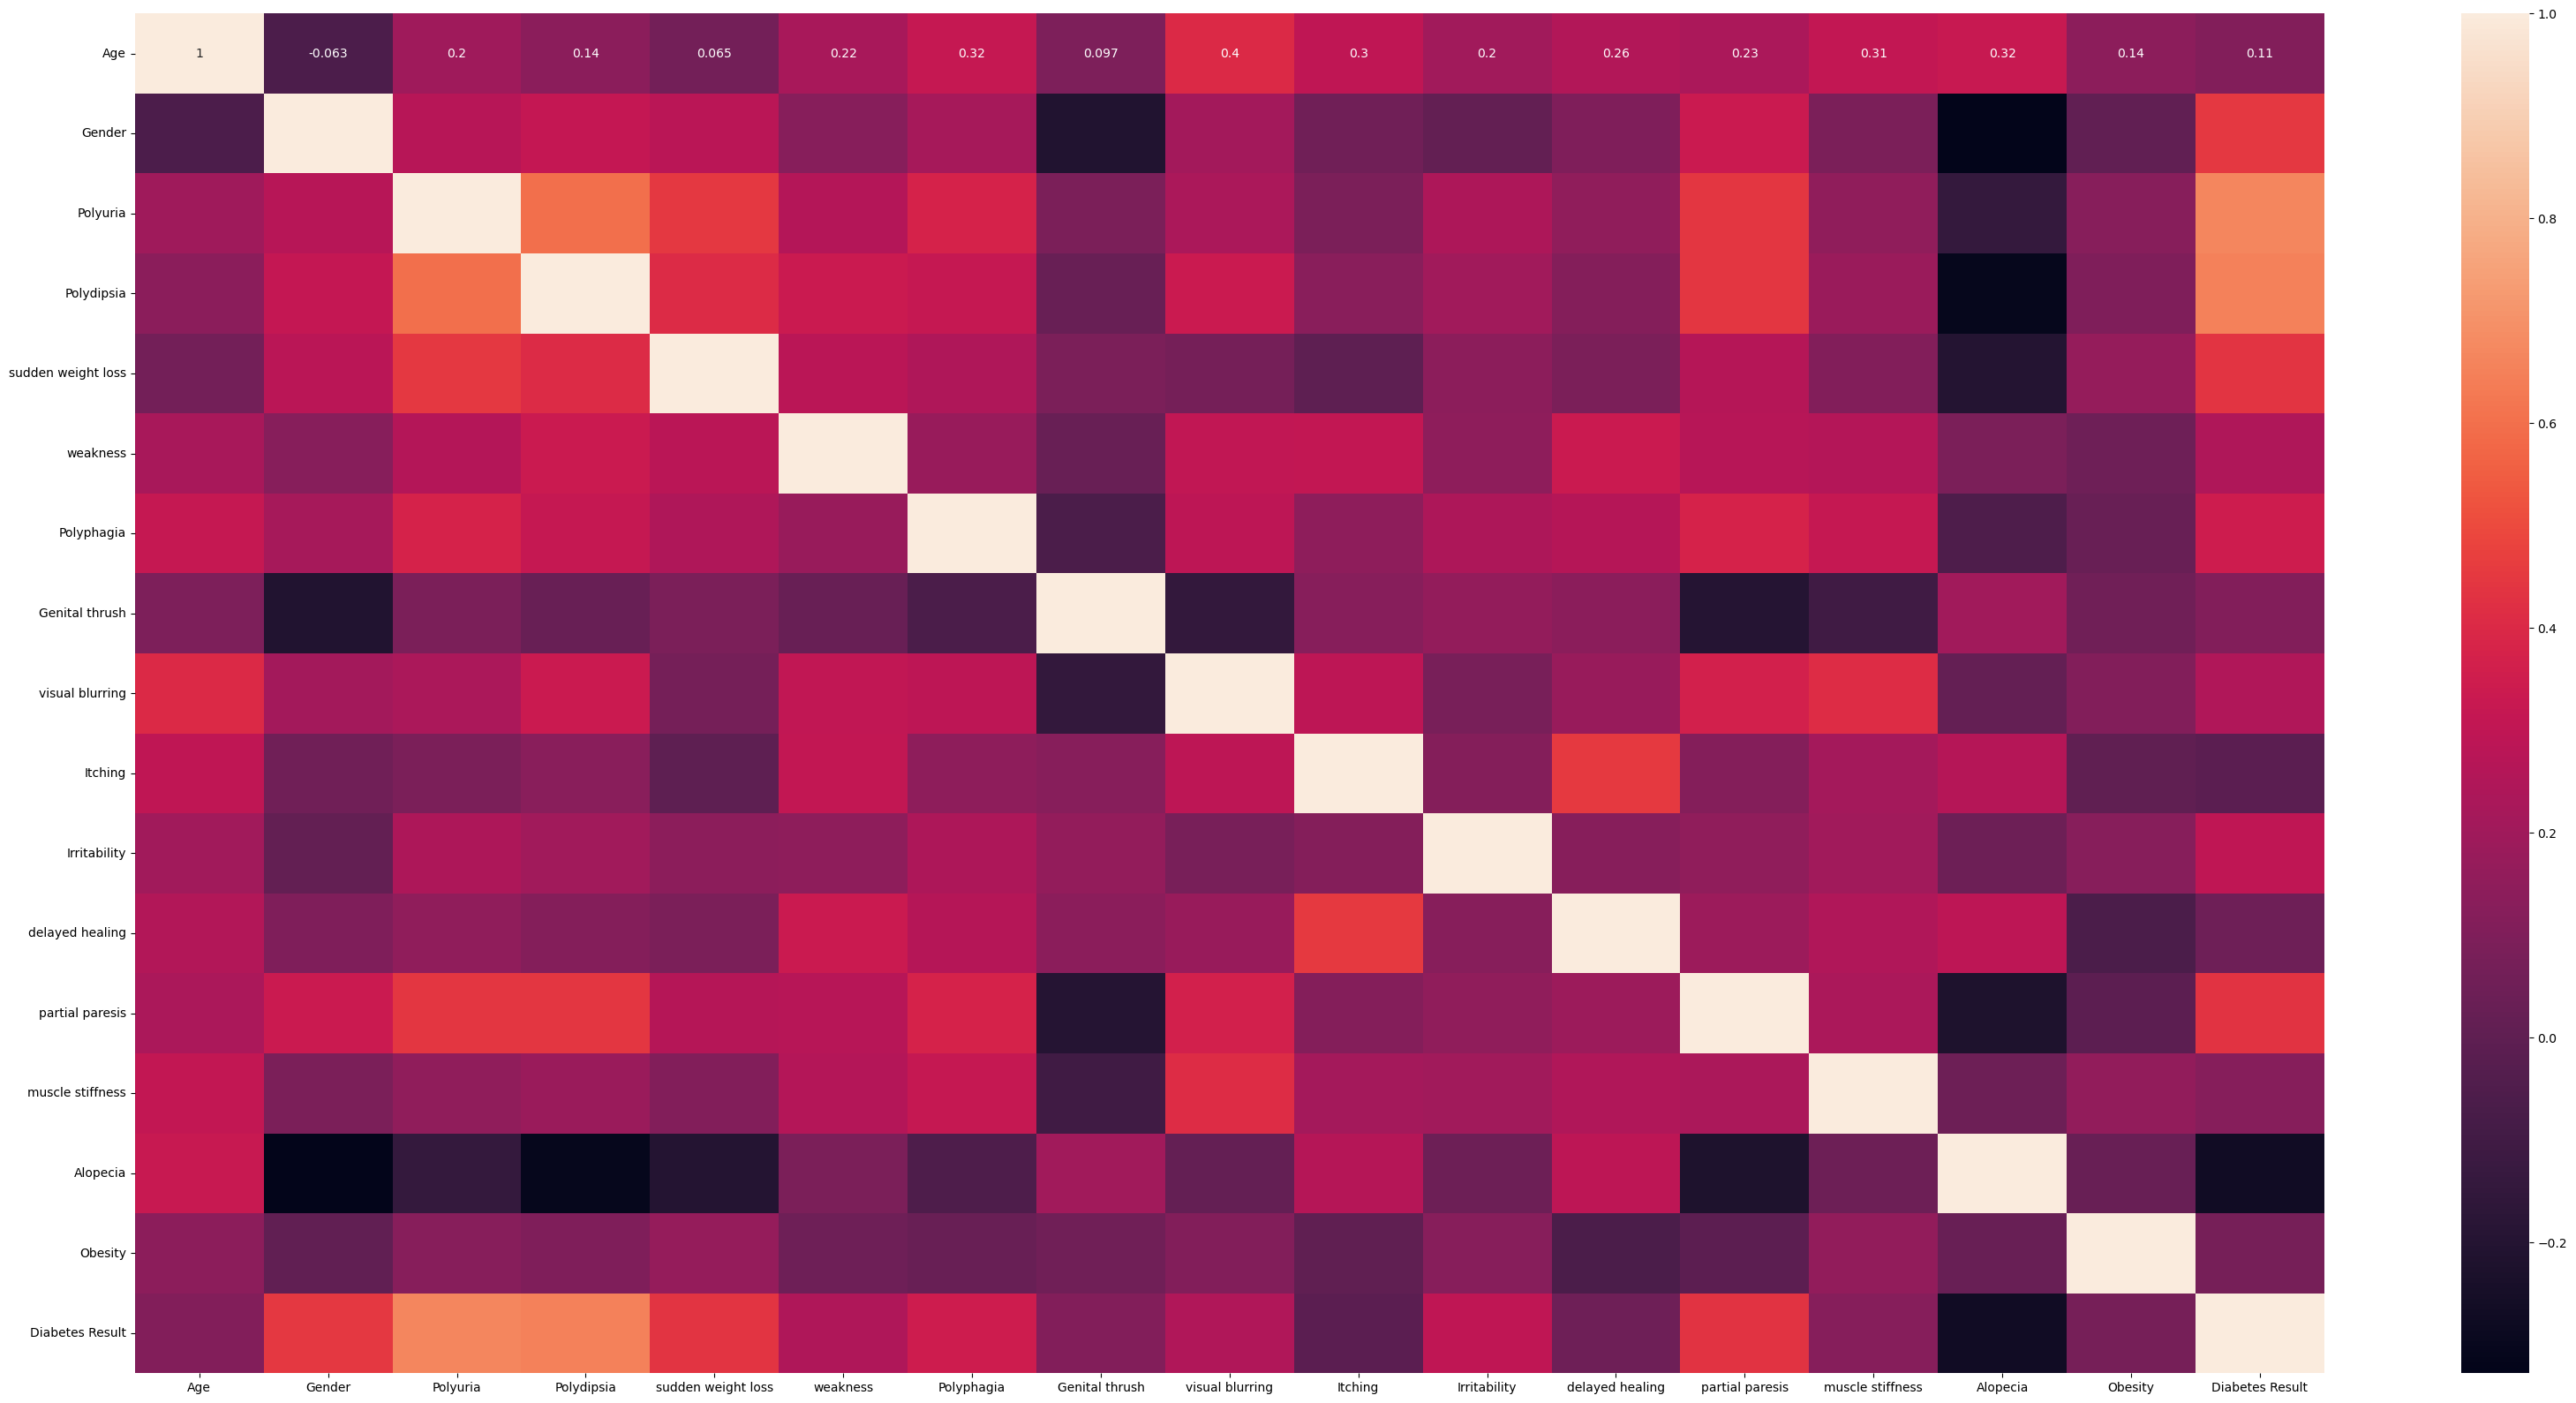

In [286]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))

# To create an annotated heatmap of the correlations, we call the heatmap() method on our sns object.
# Ensure to plug in, as first parameter, wine.corr(), and as second parameter, annot=True (so the graph is annotated)
sns.heatmap(scored_data.corr(), annot=True)

From our initial analysis, it can be shown initially that symptoms associated with Polydipsia and Polyuria (0.648734 and 0.665922) have a correlation to Diabetes Results.

#### 2. Evaluate features to select to determine best correlation to the dependent Variable

The below steps evaluate the best features that show correlation to the dependent variables. The chi square method is an optimal feature used in the industry in determining features containing categorical variables. In addition, PCA was also performed to gain initial insight to dimensionality. 

In [11]:
from sklearn.feature_selection import chi2
X = scored_data.drop(columns=['Diabetes Result'], axis = 1)
y = scored_data[['Diabetes Result']]

In [12]:
chi_scores = chi2(X,y)

In [13]:
chi_scores

(array([1.88457668e+01, 6.61938802e+01, 1.16184593e+02, 1.20785515e+02,
        5.77493088e+01, 1.27242623e+01, 3.31984177e+01, 4.91400862e+00,
        1.81245708e+01, 4.78260870e-02, 3.53341270e+01, 6.20188285e-01,
        5.53142857e+01, 4.87500000e+00, 2.44027933e+01, 2.25028409e+00]),
 array([1.41725286e-05, 4.08679471e-16, 4.33053165e-27, 4.25762360e-28,
        2.97744668e-14, 3.60942204e-04, 8.32182204e-09, 2.66397473e-02,
        2.06914149e-05, 8.26890166e-01, 2.77722772e-09, 4.30977327e-01,
        1.02719337e-13, 2.72484409e-02, 7.81552909e-07, 1.33589875e-01]))

<Axes: >

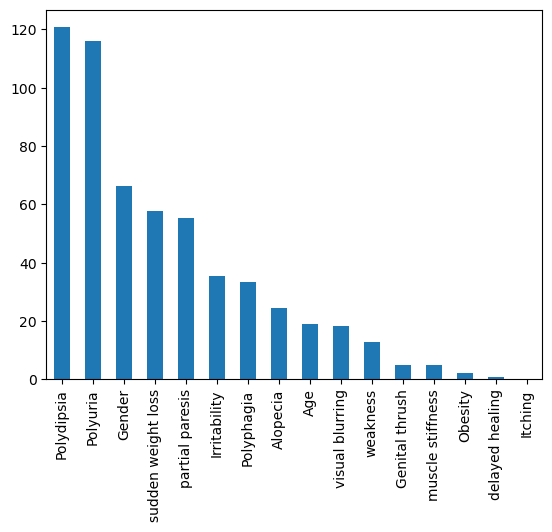

In [14]:
#higher the chi value, higher the importance. 
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

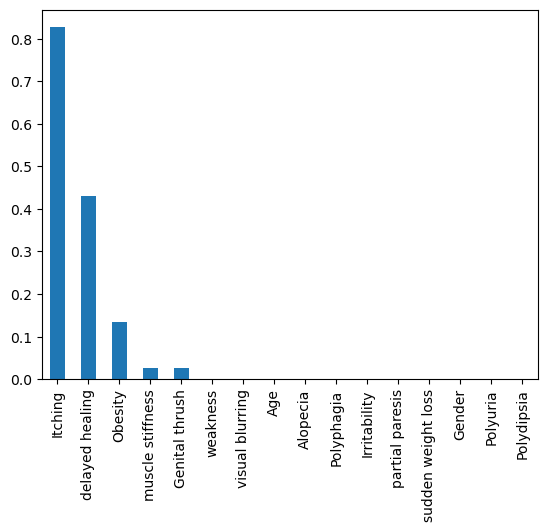

In [15]:
#higher the p-value value, lower the importance. 
#if p-value > 0.5, lower the importance. 
chi_values = pd.Series(chi_scores[1], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [293]:
pca = PCA()

In [294]:
X_pca1 = pca.fit_transform(X)

In [295]:
pca.explained_variance_ratio_

array([9.78719757e-01, 5.34926583e-03, 2.69678734e-03, 2.01789065e-03,
       1.45075693e-03, 1.39124995e-03, 1.19406166e-03, 1.10113406e-03,
       9.69801585e-04, 8.84785338e-04, 8.47246717e-04, 8.02373174e-04,
       7.23042546e-04, 6.85752333e-04, 6.37420089e-04, 5.28674597e-04])

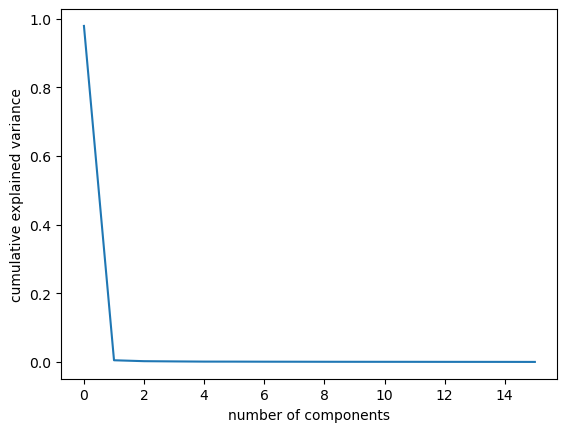

In [296]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above feature analysis, it shows that an model can be generated, with 1-5 features (independent variables or x-values). 

#### 3. Exploring data using a linear model

For our first model, we chose the feature that was ranked highest from the chi square method, and experimented by implementing just one feature, as shown in our PCA step. 

In [297]:
X_1 = scored_data[['Polydipsia']]
y = scored_data[['Diabetes Result']]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25, random_state = 123)

In [298]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(390, 1) (390, 1)
(130, 1) (130, 1)


In [299]:
rModel = linear_model.LinearRegression()

In [300]:
rModel.fit(X_train, y_train)

LinearRegression()

In [301]:
print(rModel.score(X_train, y_train))

0.41292860634558526


Our linear model had shown that accuracy would yield around 41%. 

#### 4. Exploring data using a Ordinary Least Squares

In [302]:
X_2 = scored_data[['Polydipsia', 'Polyuria']]

X_2 = sm.add_constant(X_2)

In [303]:
y = scored_data[['Diabetes Result']]

X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 123)

In [304]:
# Create the model
rModel2 = sm.OLS(y_train, X_2_train)
# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [305]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Diabetes Result   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.04e-62
Time:                        19:48:54   Log-Likelihood:                -129.51
No. Observations:                 390   AIC:                             265.0
Df Residuals:                     387   BIC:                             276.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.025      9.744      0.000       0.193       0.291
Polydipsia     0.3935      0.043      9.181      0.000       0.309       0.478
Polyuria       0.3992      0.043      9.383      0.000       0.316       0.483
==============================================================================
Omnibus:                       34.179   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.778
Skew:                           0.780   Prob(JB):                     1.40e-09
Kurtosis:                       3.279   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our OLS result, it shows that implementing the top 2 features into a linear regression model, using OLS yielded better accuracy, 52%, however not ideal. 

#### 4. Exploring data using a Ordinary Least Squares by dropping the the feature with the highest p-value. 

In [40]:
X_3 = scored_data.drop(['Itching', 'Diabetes Result'], axis=1)

X_3 = sm.add_constant(X_3)

In [41]:
y = scored_data[['Diabetes Result']]

X_3_train, X_3_test, y_train, y_test = train_test_split(X_3, y, test_size = 0.25, random_state = 42)

In [42]:
# Create the model
rModel3 = sm.OLS(y_train , X_3_train)
# Fit the model with fit() 
rModel3_results = rModel3.fit()

In [43]:
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Diabetes Result   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     46.41
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           9.19e-76
Time:                        10:01:47   Log-Likelihood:                -69.232
No. Observations:                 390   AIC:                             170.5
Df Residuals:                     374   BIC:                             233.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1912      0.066      2.877      0.004       0.061       0.322
Age                   -0.0014      0.002     -0.887      0.376      -0.004       0.002
Gender                 0.2478      0.036      6.796      0.000       0.176       0.319
Polyuria               0.3197      0.041      7.812      0.000       0.239       0.400
Polydipsia             0.2513      0.043      5.825      0.000       0.166       0.336
sudden weight loss     0.1079      0.037      2.941      0.003       0.036       0.180
weakness               0.0161      0.036      0.451      0.652      -0.054       0.086
Polyphagia             0.0255      0.036      0.704      0.482      -0.046       0.097
Genital thrush         0.1715      0.040      4.284      0.000       0.093       0.250
visual blurring        0.0580      0.039      1.495      0.136      -0.018       0.134
Irritability           0.1503      0.038      3.937      0.000       0.075       0.225
delayed healing       -0.1058      0.036     -2.922      0.004      -0.177      -0.035
partial paresis        0.0866      0.038      2.294      0.022       0.012       0.161
muscle stiffness      -0.0522      0.036     -1.437      0.151      -0.124       0.019
Alopecia              -0.0052      0.040     -0.128      0.898      -0.085       0.074
Obesity               -0.0170      0.043     -0.391      0.696      -0.102       0.068
==============================================================================
Omnibus:                       34.256   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.741
Skew:                           0.771   Prob(JB):                     1.42e-09
Kurtosis:                       3.358   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Performing a multiple linear regression and testing using the Ordinary Least Squares method yielded the same accuracy as above. 

#### 5a. Exploring data using Logistic Regression (top feature). 

In [123]:
X_4 = scored_data[['Polydipsia']]
X_4 = sm.add_constant(X_4)
y = scored_data[['Diabetes Result']]
y = np.ravel(y.values)

X_4_train, X_4_test, y_train, y_test = train_test_split(X_4, y, test_size = 0.25, random_state = 42)

Accuracy for the model is  80.76923076923077 %


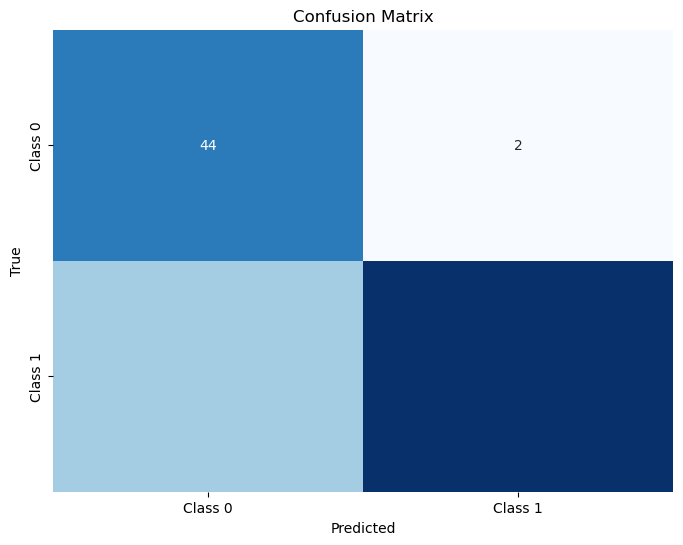

In [122]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_4_train, y_train)
y_preds = log_model.predict(X_4_test)
log_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy for the model is ', log_accuracy*100 , '%')

cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 5b. Exploring data using a Logistic Regression (top 3 features). 

In [54]:
X_5 = scored_data[['Polydipsia', 'Polyuria', 'Gender']]
X_5 = sm.add_constant(X_5)
y = scored_data[['Diabetes Result']]
y = np.ravel(y.values)

X_5_train, X_5_test, y_train, y_test = train_test_split(X_5, y, test_size = 0.25, random_state = 42)

Accuracy for the model is  90.76923076923077 %


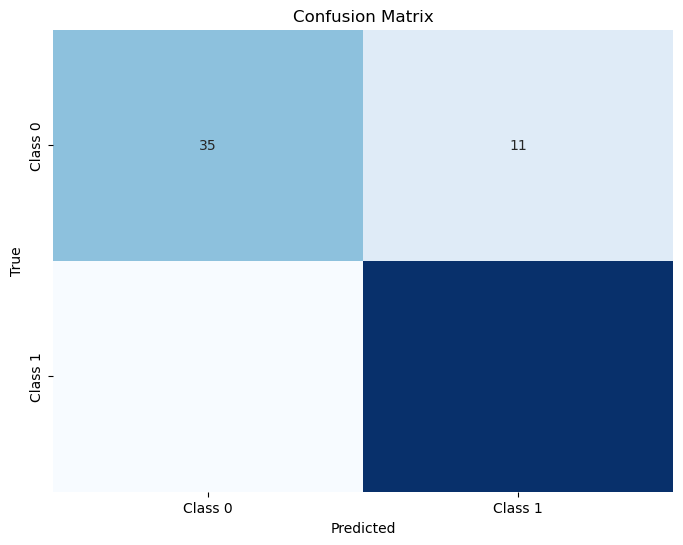

In [115]:
log_model = LogisticRegression()
log_model.fit(X_5_train, y_train)
y_preds = log_model.predict(X_5_test)
log_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy for the model is ', log_accuracy*100 , '%')

cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 5c. Exploring data using a Logistic Regression (9 features - elimination of least correlated features). 

In [104]:
X_7 = scored_data.drop(['Itching', 'Diabetes Result', 'sudden weight loss', 'weakness', 'visual blurring', 'muscle stiffness', 'Alopecia', 'Obesity'], axis=1)
X_7 = sm.add_constant(X_7)
y = scored_data[['Diabetes Result']]
y = np.ravel(y.values)

X_7_train, X_7_test, y_train, y_test = train_test_split(X_7, y, test_size = 0.25, random_state = 42)

In [105]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_7_train, y_train)
y_preds = log_model.predict(X_7_test)
log_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy for the model is ', log_accuracy*100 , '%')

Accuracy for the model is  93.07692307692308 %


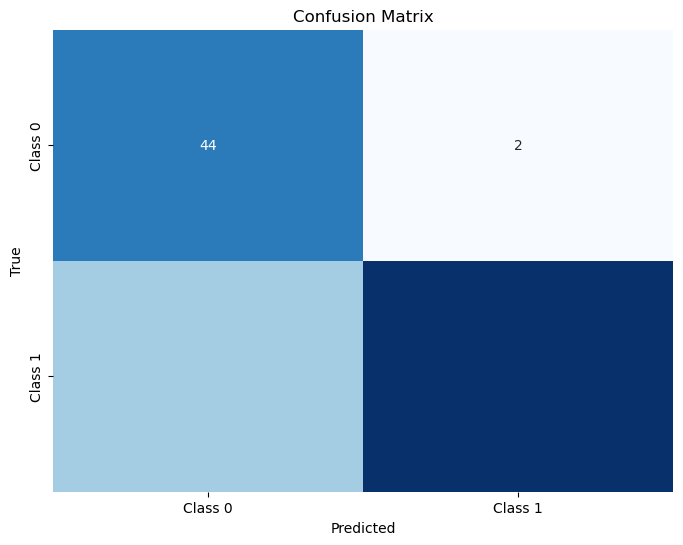

In [124]:
cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 6. Hypothesis Testing 

It was observed that the model performances using logistic regression had improved as additional features were added. However, It was also observed that the performance of the Confusion Matrix performed the best for logistic regression model 5a, although this model had yielded the lowest accuracy.

Since models 5a and 5c yielded the best performances and incorporate the same features. The hypothesis and null hypothesis will be tested below through the Logit Regression test to evaluate the p-values of each features. 
#### Hypothesis: ### 
Age, Gender, Polyuria, Polydipsia, Polyphagia, Genital thrush, Irritability, delayed healing, and partial paresis have a correlation to having diabetes. 
#### Null Hypothesis: ###
Age, Gender, Polyuria, Polydipsia, Polyphagia, Genital thrush, Irritability, delayed healing, and partial paresis DO NOT have a correlation to having diabetes. 

In [127]:
logit_model = sm.Logit(y, X_7)
result = logit_model.fit(max_iter=1000)

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.192246
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  520
Model:                          Logit   Df Residuals:                      510
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                  0.7115
Time:                        10:52:22   Log-Likelihood:                -99.968
converged:                       True   LL-Null:                       -346.46
Covariance Type:            nonrobust   LLR p-value:                1.818e-100
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9622      0.798     -1.206      0.228      -2.526       0.602
Age           

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(


It was observed from hypothesis testing that the average p-value of all the features yielded an average p-value of 0.00622, thus, the hypothesis is statistically significant enough to reject the null hypothesis. 